# Exercise 05

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
The project must be carried out in the groups assigned in class.
Use clear and rigorous procedures.
Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

## Using the example_retail_sales dataset:
- Standardize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

## Solución

#### Cargar Data

In [102]:
import pandas as pd
import numpy as np
%matplotlib inline

births = pd.read_csv('../datasets/example_retail_sales.csv')
df = pd.DataFrame()
df['ds'] = pd.to_datetime(births['ds'], format='%Y-%m-%d')
df['y'] = births['y']
df.set_index(df['ds'], inplace=True)

In [103]:
df.head()

,ds,y
ds,,
1992-01-01,1992-01-01,146376
1992-02-01,1992-02-01,147079
1992-03-01,1992-03-01,159336
1992-04-01,1992-04-01,163669
1992-05-01,1992-05-01,170068


In [104]:
df.tail()

,ds,y
ds,,
2016-01-01,2016-01-01,400928
2016-02-01,2016-02-01,413554
2016-03-01,2016-03-01,460093
2016-04-01,2016-04-01,450935
2016-05-01,2016-05-01,471421


#### Estandarización de la serie con np.log

In [105]:
df['y'] = np.log(df['y'])

#### Gráfica de la serie

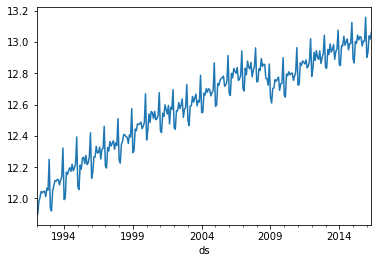

In [106]:
df['y'].plot()

Se evidencia en la gráfica anterior que la serie de tiempo de ventas, ha tenido una tendencia, a lo largo de los años ha aumentado, sin embargo, hubo una caida en el año 2008, probablemente por la crisis económica. Además se evidencia una estacionalidad, en los meses de enero y diciembre, aumentan las ventas.

#### Cargue de paquete fbprophet y corrida de modelo al data frame

In [107]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Creación de los próximos 6 meses con la función make_future_dataframe para predecir

In [115]:
future = m.make_future_dataframe(periods=6, freq='MS')
future.tail(6)

,ds
293,2016-06-01
294,2016-07-01
295,2016-08-01
296,2016-09-01
297,2016-10-01
298,2016-11-01


#### Predicción de los próximos 6 meses de ventas

In [116]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
293,2016-06-01,13.055218,13.033861,13.075381
294,2016-07-01,13.056161,13.036929,13.075601
295,2016-08-01,13.076736,13.055630,13.096543
296,2016-09-01,13.009717,12.988278,13.030637
297,2016-10-01,13.048712,13.026909,13.069392
298,2016-11-01,13.053181,13.030300,13.075327


#### Gráfica de la predicción de los siguientes 6 meses con sus intervalos de confianza

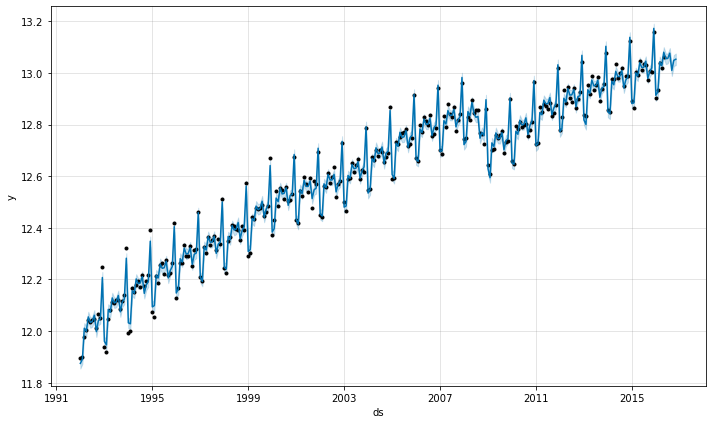

In [117]:
fig1 = m.plot(forecast)

Se evidencia en la gráfica anterior que el pronóstico de los siguientes 6 meses tiene una tendencia similar a los anteriores periodos. Además es interesante observar que si se pronóstica más meses (3 años), está predicción tiene un buen comportamiento, como se muestra a continuación:

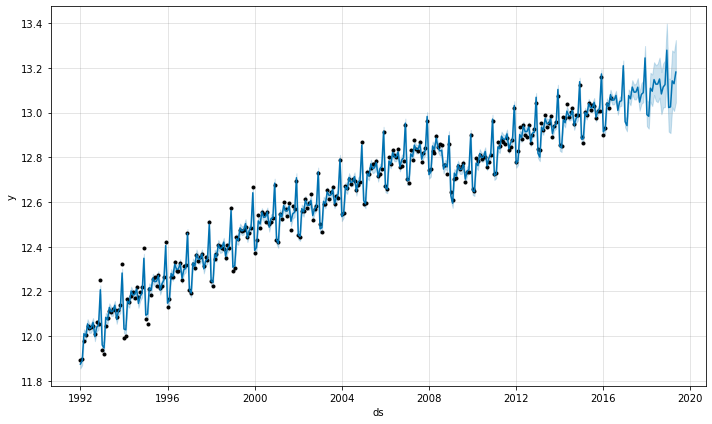

In [119]:
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)
fig1 = m.plot(forecast)

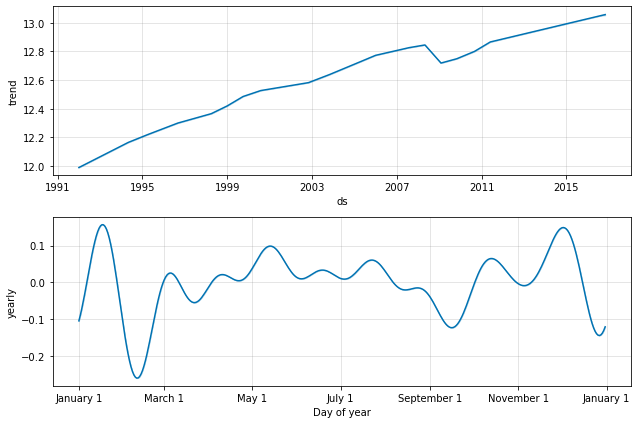

In [111]:
m.plot_components(forecast);

Se comprueba en primera instancia, que la tendencia ha incrementado a lo largo de los años y tuvo una caida en el año 2008. Asimismo, como se había mencionado antes, los meses diciembre y febrero tienen una estacionalidad alta de ventas, por otro lado a finales de febrero y en el mes de octubre las ventas bajan.

#### Se concluye que el modelo fbprophet ajusta muy bien a los datos y realiza una buena predicción de los siguientes meses.